# Project – Analyzing the trends of COVID-19 with Python

Problem Statement:
Given data about COVID 19 patients, write code to visualize the impact and analyze the trend
of rate of infection and recovery as well as make predictions about the number of cases
expected a week in future based on the current trends

Guidelines:
* • Use pandas to accumulate data from multiple data files
* • Use plotly (visualization library) to create interactive visualizations
* • Use Facebook prophet library to make time series models
* • Visualize the prediction by combining these technologies

## Importing necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
import plotly.express as px #we will use chloropleth from this.
import warnings
warnings.filterwarnings('ignore')

In [4]:
#after importing our next step is to load the dataset
data = pd.read_csv('covid_19_clean_complete (13).csv', parse_dates = ['Date']) #we want the date column as a datetime datatype

In [5]:
data

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [6]:
data.dtypes

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
Active                     int64
WHO Region                object
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


#### We can clearly see that the column date is already set to datetime format and is ready to do further operations.

*Now i would like to rename the columns as it is complicated to write and perform various operations*

In [9]:
data.rename(columns={'Date':'date','Province/State':'state','Country/Region':'country','Lat':'lat','Long':'long',
                     'Confirmed':'confirmed','Deaths':'deaths','Recovered':'recovered','Active':'active'},inplace=True)

#by applying inplace we are simply changing our column name in our original datasets.

In [10]:
data.head()

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [11]:
data['date'].value_counts()

2020-01-22    261
2020-05-30    261
2020-05-21    261
2020-05-22    261
2020-05-23    261
             ... 
2020-03-26    261
2020-03-27    261
2020-03-28    261
2020-03-29    261
2020-07-27    261
Name: date, Length: 188, dtype: int64

For every dates there is 261 values. So let us visualize how each countries is get effected by the COVID 19 virus in a single day.

In [12]:
top = data[data['date']==data['date'].max()]
top #we have selected the maximum date to visualize that how the corona virus is spreading in each countries.

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [13]:
w = top.groupby('country')['confirmed','active','deaths'].sum().reset_index()
w
#we will sum up the aggregate values now.

,country,confirmed,active,deaths
0,Afghanistan,36263,9796,1269
1,Albania,4880,1991,144
2,Algeria,27973,7973,1163
3,Andorra,907,52,52
4,Angola,950,667,41
...,...,...,...,...
182,West Bank and Gaza,10621,6791,78
183,Western Sahara,10,1,1
184,Yemen,1691,375,483
185,Zambia,4552,1597,140


Now we are going to use Chloropleth.

### Choropleth - A choropleth map is a thematic map that is used to represent statistical data using the color mapping symbology technique.

In [14]:
fig=px.choropleth(w,locations='country',locationmode='country names',color='active',hover_name='country',
                 range_color=[1,1500],color_continuous_scale="Peach",title='Active cases Countries')
fig.show()

### By the avobe map we can clearly see those countries who are been in the active stage and who is less active by the COVID 19 virus. By the help of this map we can easily understand that which countries are suffering from the corona virus so much.

#### Now lets us check the confirmed cases. We will use matplotlib and seaborn to visualize it.

Text(0, 0.5, 'Cases total')

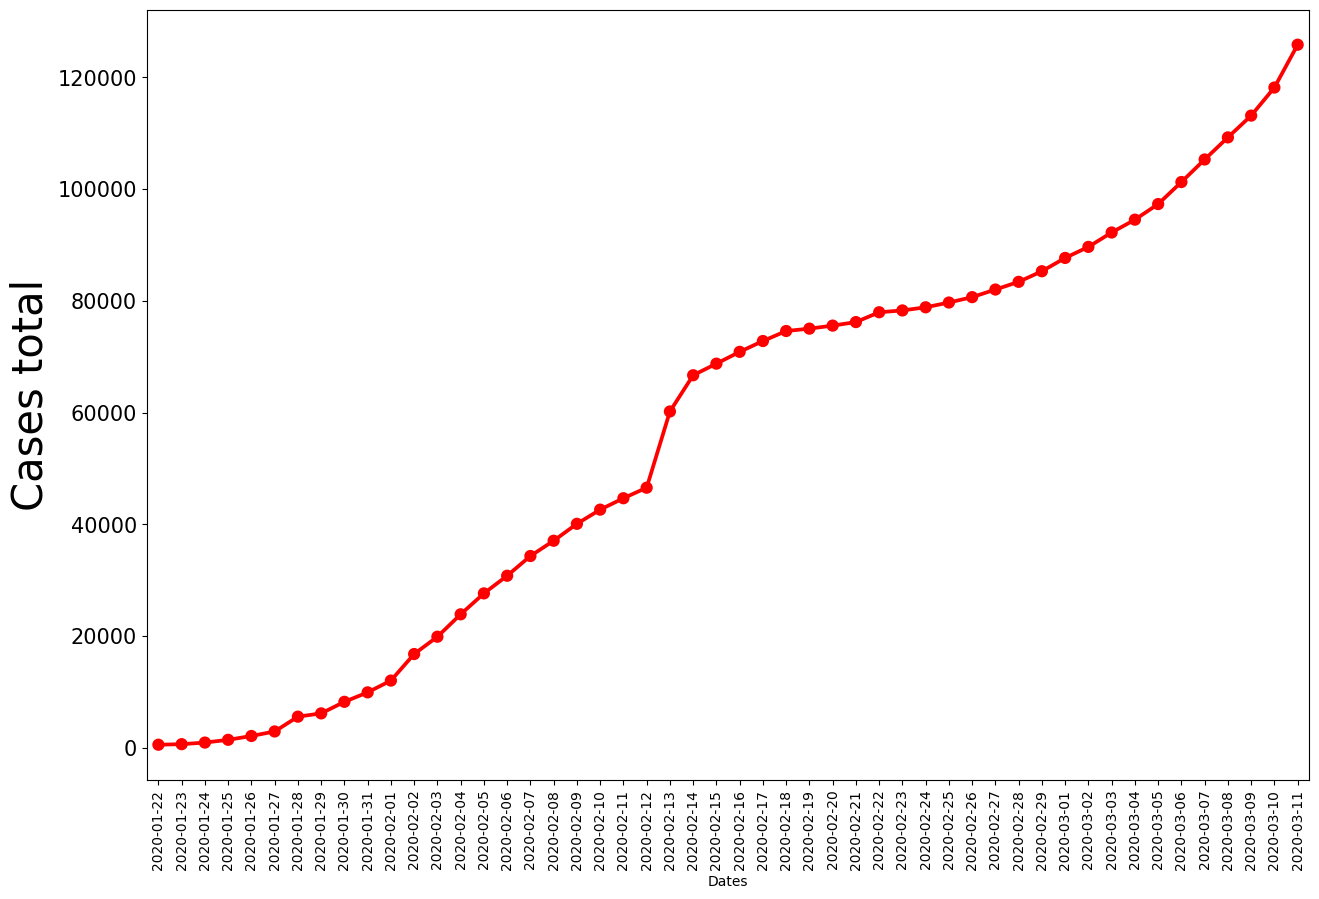

In [15]:
#plot for confirmed cases
plt.figure(figsize=(15,10))

t_cases = data.groupby('date')['confirmed'].sum().reset_index()
t_cases['date'] = pd.to_datetime(t_cases['date'])

a=sns.pointplot(x=t_cases.date.dt.date.head(50),y=t_cases.confirmed.head(50),color='r')
a.set(xlabel='Dates',ylabel='Cases total')

plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel('Dates',fontsize=10)
plt.ylabel('Cases total',fontsize=30)

## Here we are visualizing top 50 records of covid 19 confirmed case. As we can see the trend is going upward. So we can easily say that the case of confirm will increase day by day.

In [16]:
#now lets us see the top 20 countries who are suffering from this deadliest virus.
t_actives=top.groupby(by='country')['active'].sum().sort_values(ascending=False).head(20).reset_index()
t_actives

,country,active
0,US,2816444
1,Brazil,508116
2,India,495499
3,United Kingdom,254427
4,Russia,201097
5,South Africa,170537
6,Colombia,117163
7,France,108928
8,Canada,107514
9,Peru,98752


#### US is in the top. And we can clearly see that the top 5 countries should take some remedies to control the deadliest virus.
Hence now we are going to plot this into a bar chart for more details.

Text(0, 0.5, 'Countryl')

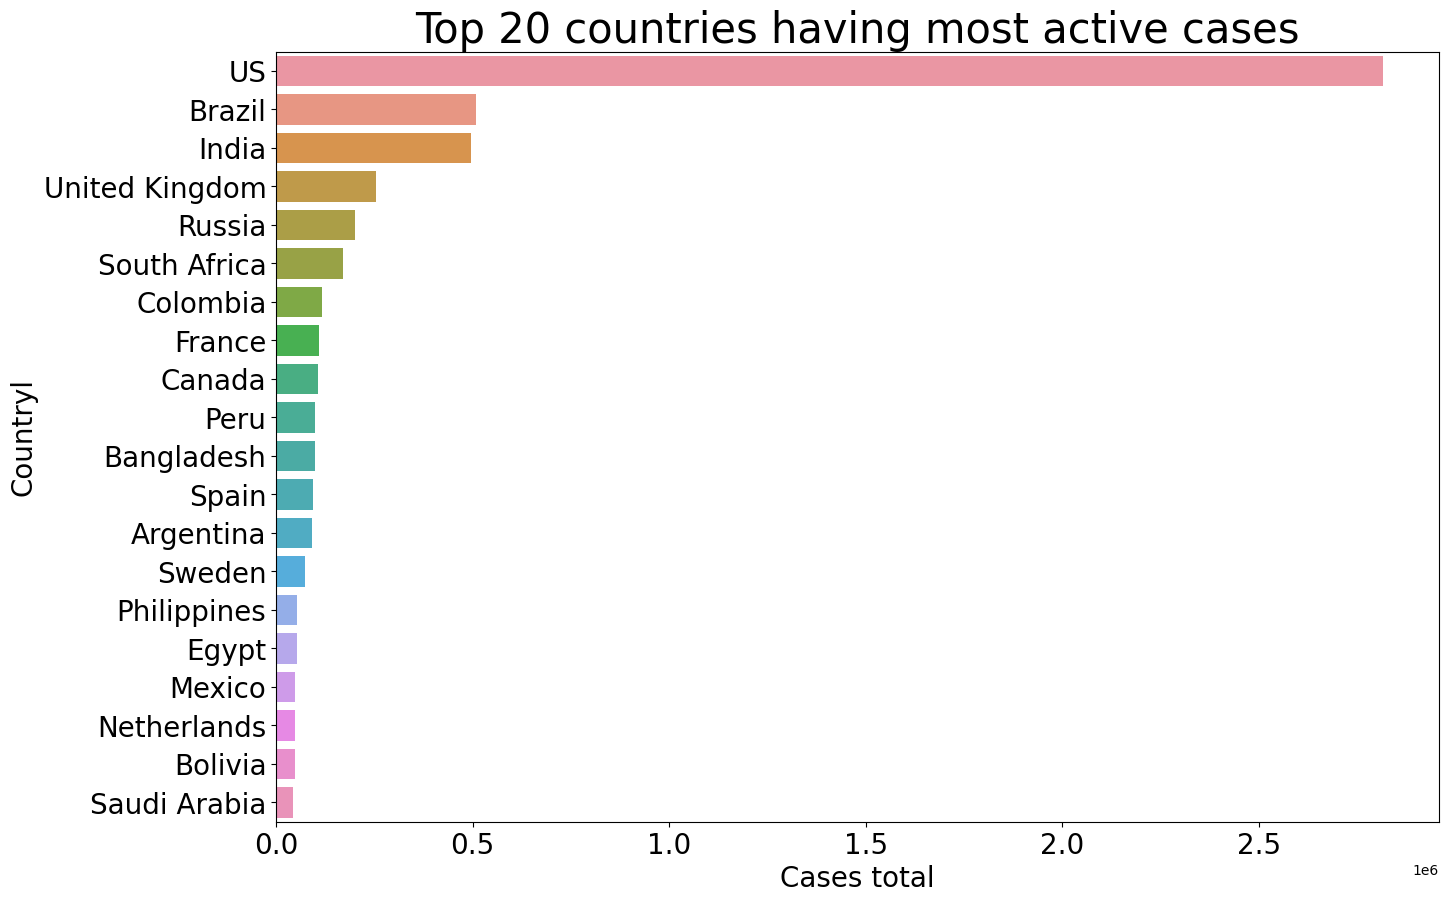

In [17]:
plt.figure(figsize=(15,10))
plt.title('Top 20 countries having most active cases',fontsize=30)
#barplot
a=sns.barplot(x=t_actives.active,y=t_actives.country)

a.set(xlabel='Cases total',ylabel='Country')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Cases total',fontsize=20)
plt.ylabel('Countryl',fontsize=20)

## We will install prophet for the predictions here. The input of prophet is always a dataframe with two columns: ds and y.

In [18]:
pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
from prophet import Prophet

In [20]:
data.head()

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [21]:
confirmed = data.groupby('date')['confirmed'].sum().reset_index()
deaths = data.groupby('date').sum()['deaths'].reset_index()
recovered = data.groupby('date').sum()['recovered'].reset_index()
confirmed.tail()

,date,confirmed
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796
187,2020-07-27,16480485


In [22]:
confirmed.columns = ['ds', 'y']
confirmed['ds']= pd.to_datetime(confirmed['ds'])
confirmed.tail()

,ds,y
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796
187,2020-07-27,16480485


In [23]:
m = Prophet() 
m.fit(confirmed)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnp99gf3y/bn8rn673.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnp99gf3y/cruu9656.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88421', 'data', 'file=/tmp/tmpnp99gf3y/bn8rn673.json', 'init=/tmp/tmpnp99gf3y/cruu9656.json', 'output', 'file=/tmp/tmpnp99gf3y/prophet_model6a3dxdlv/prophet_model-20230516071134.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:11:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [24]:
future = m.make_future_dataframe(periods=7,freq='D')
future.tail(12) #here periods means we are predicting it for next 7 days and freq is set to D which stands for daily.

,ds
183,2020-07-23
184,2020-07-24
185,2020-07-25
186,2020-07-26
187,2020-07-27
188,2020-07-28
189,2020-07-29
190,2020-07-30
191,2020-07-31
192,2020-08-01


In [25]:
#m.predict()
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-2.164495e+04,-1.243797e+05,7.896272e+04
1,2020-01-23,-8.953012e+03,-1.201502e+05,9.958402e+04
2,2020-01-24,4.976597e+03,-9.531136e+04,1.034388e+05
3,2020-01-25,1.135279e+04,-9.297141e+04,1.151908e+05
4,2020-01-26,7.628190e+03,-9.812692e+04,1.116719e+05
...,...,...,...,...
190,2020-07-30,1.674386e+07,1.664789e+07,1.685038e+07
191,2020-07-31,1.695903e+07,1.685296e+07,1.707192e+07
192,2020-08-01,1.716665e+07,1.705717e+07,1.728964e+07
193,2020-08-02,1.736416e+07,1.725380e+07,1.747591e+07


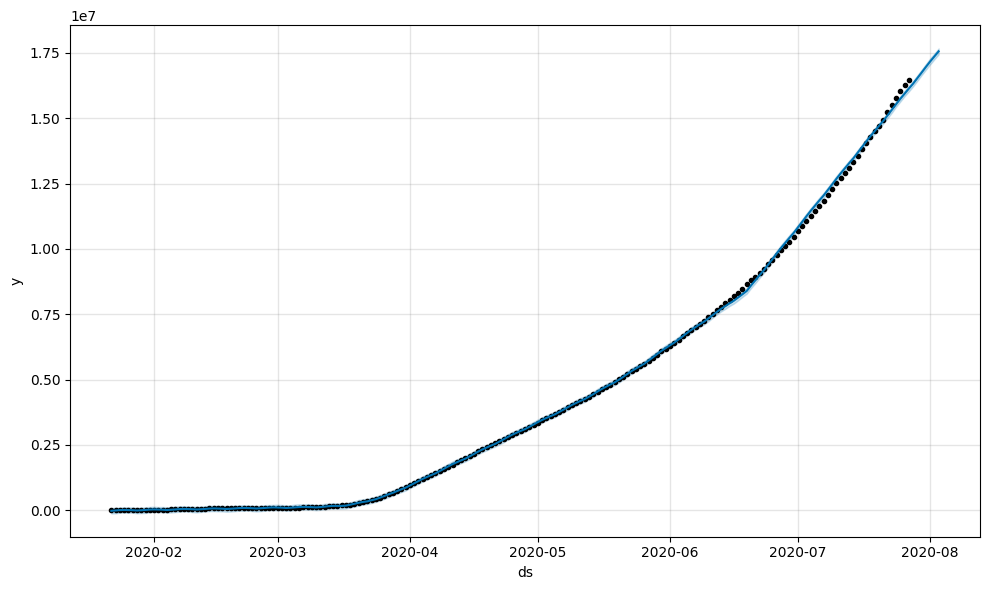

In [26]:
confirmed_cases_forecast = m.plot(forecast)

In [27]:
forecast['yhat'] = forecast['yhat'].astype(int)

In [28]:
forecast[['ds','yhat']].tail(12)

,ds,yhat
183,2020-07-23,15315917
184,2020-07-24,15531087
185,2020-07-25,15738704
186,2020-07-26,15936220
187,2020-07-27,16130844
188,2020-07-28,16320122
189,2020-07-29,16529927
190,2020-07-30,16743859
191,2020-07-31,16959029
192,2020-08-01,17166646


In [29]:
deaths.columns = ['ds', 'y']
deaths['ds']= pd.to_datetime(deaths['ds'])

In [30]:
m = Prophet()
m.fit(deaths)
future=m.make_future_dataframe(periods=21)
future.tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnp99gf3y/rt52dul1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnp99gf3y/aglgwdd1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36667', 'data', 'file=/tmp/tmpnp99gf3y/rt52dul1.json', 'init=/tmp/tmpnp99gf3y/aglgwdd1.json', 'output', 'file=/tmp/tmpnp99gf3y/prophet_modelo3m_gbep/prophet_model-20230516071451.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:14:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:14:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
204,2020-08-13
205,2020-08-14
206,2020-08-15
207,2020-08-16
208,2020-08-17


In [31]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(21)

,ds,yhat,yhat_lower,yhat_upper
188,2020-07-28,652331.132148,650332.051059,654309.750653
189,2020-07-29,657897.844463,655781.227675,659900.851981
190,2020-07-30,663508.283269,661453.688590,665549.382313
191,2020-07-31,669024.787703,666857.316806,671258.747845
192,2020-08-01,673907.743013,671418.930592,676218.748248
193,2020-08-02,678044.996954,675203.420344,680527.152834
194,2020-08-03,682336.032139,679156.039952,684880.744956
195,2020-08-04,687543.659687,684155.293437,690566.645286
196,2020-08-05,693110.372001,689172.139868,696350.356219
197,2020-08-06,698720.810808,694455.384955,702010.745854


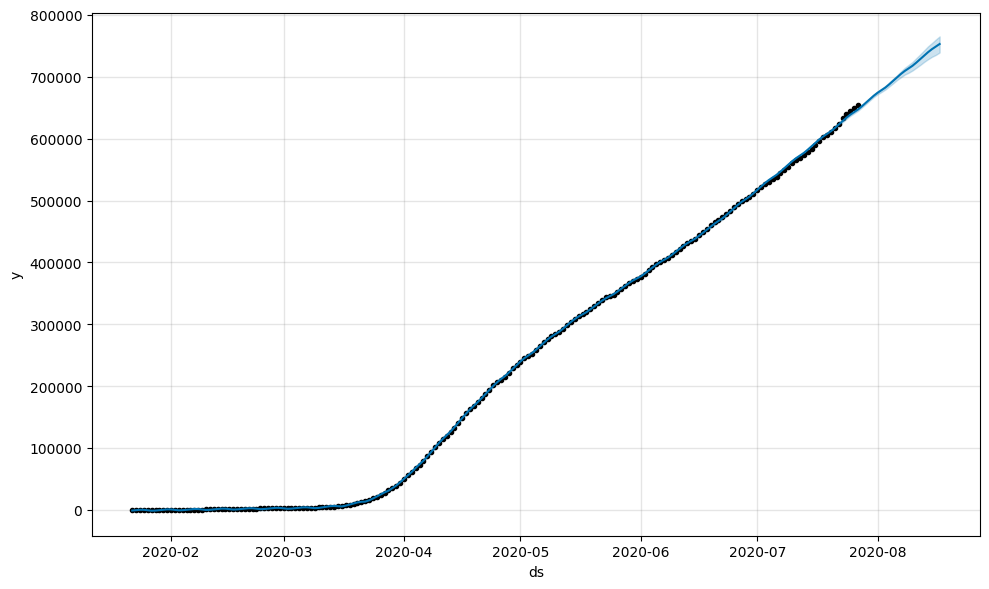

In [32]:
death_cases_forecast = m.plot(forecast)

In [33]:
forecast['yhat'] = forecast['yhat'].astype(int)
forecast[['ds','yhat']].tail(25)

,ds,yhat
184,2020-07-24,633812
185,2020-07-25,638695
186,2020-07-26,642832
187,2020-07-27,647123
188,2020-07-28,652331
189,2020-07-29,657897
190,2020-07-30,663508
191,2020-07-31,669024
192,2020-08-01,673907
193,2020-08-02,678044


In [34]:
recovered.columns = ['ds' , 'y']
recovered['ds'] = pd.to_datetime(recovered['ds'])

In [35]:
m = Prophet()
m.fit(recovered)
future=m.make_future_dataframe(periods=21)
future.tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnp99gf3y/9v9dyjqm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnp99gf3y/7twf8_l4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23869', 'data', 'file=/tmp/tmpnp99gf3y/9v9dyjqm.json', 'init=/tmp/tmpnp99gf3y/7twf8_l4.json', 'output', 'file=/tmp/tmpnp99gf3y/prophet_modelqwjvjv5_/prophet_model-20230516071802.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:18:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:18:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
204,2020-08-13
205,2020-08-14
206,2020-08-15
207,2020-08-16
208,2020-08-17


In [36]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(21)

,ds,yhat,yhat_lower,yhat_upper
188,2020-07-28,9.315214e+06,9.239714e+06,9.390155e+06
189,2020-07-29,9.457530e+06,9.373562e+06,9.536637e+06
190,2020-07-30,9.600400e+06,9.520108e+06,9.676548e+06
191,2020-07-31,9.742022e+06,9.663068e+06,9.821299e+06
192,2020-08-01,9.882416e+06,9.804403e+06,9.963188e+06
193,2020-08-02,1.000855e+07,9.929936e+06,1.009259e+07
194,2020-08-03,1.014520e+07,1.006233e+07,1.023478e+07
195,2020-08-04,1.027272e+07,1.019163e+07,1.036073e+07
196,2020-08-05,1.041504e+07,1.032844e+07,1.050685e+07
197,2020-08-06,1.055791e+07,1.045601e+07,1.065166e+07


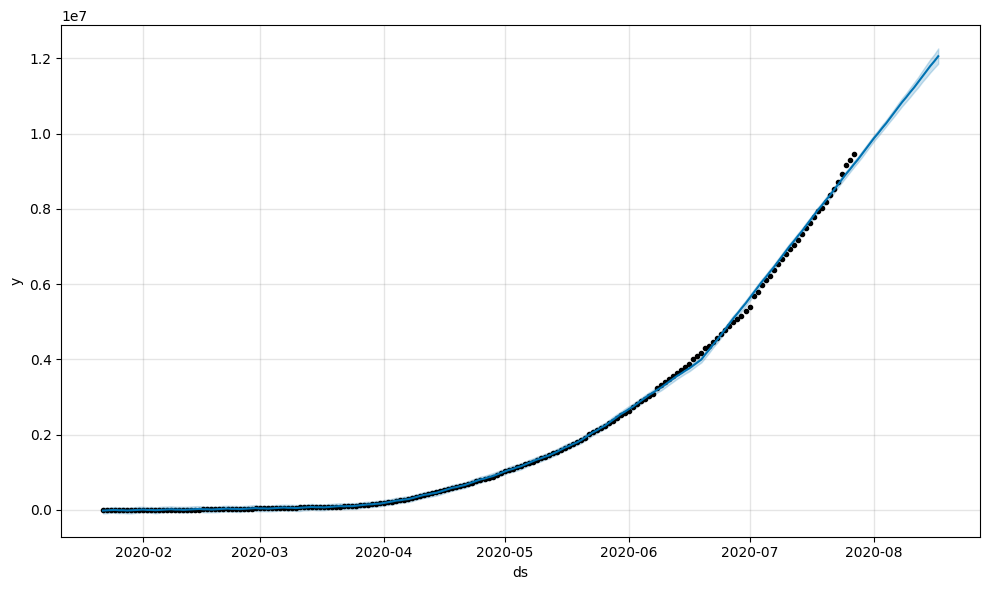

In [37]:
recovered_forecast_plot = m.plot(forecast)

In [38]:
forecast['yhat'] = forecast['yhat'].astype(int)
forecast[['ds','yhat']].tail(25)

,ds,yhat
184,2020-07-24,8784515
185,2020-07-25,8924909
186,2020-07-26,9051040
187,2020-07-27,9187694
188,2020-07-28,9315214
189,2020-07-29,9457530
190,2020-07-30,9600400
191,2020-07-31,9742022
192,2020-08-01,9882416
193,2020-08-02,10008547


***As we can see our predicitons are close to each other. As the datasets are small so we are only calculating it for the next 21 days. But we can predict as we want to do. But if we want to increase the dates then our accuracy might get dropped***

***By SAMRAT KUNDU***